In [13]:
from cmdstanpy import CmdStanModel


import arviz as az
import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt
import pandas as pd

We will generate fake data, that will simulate dataset of 100 outputs from 200 dimensional linear model along with appropriate predictors. Our goal will be estimation of the parameters of the model.

In [14]:
data_genetator = CmdStanModel(stan_file = 'generate_data.stan')

INFO:cmdstanpy:compiling stan file C:\Users\PLFIZMI\Desktop\analiza\Data-Analytics\lab5\generate_data.stan to exe file C:\Users\PLFIZMI\Desktop\analiza\Data-Analytics\lab5\generate_data.exe
INFO:cmdstanpy:compiled model executable: C:\Users\PLFIZMI\Desktop\analiza\Data-Analytics\lab5\generate_data.exe


In [15]:
I= len('Filip')
N= len('Zmijewski')
DoB= 1998
seed=int(DoB*1e4+100*I+N)
print(seed)
generated_data = data_genetator.sample(chains=1, iter_sampling=1, iter_warmup=0, fixed_param=True,seed=seed)

19980509


INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


### Coefficients of linear model
Only few of beta coefficients are significantly greater than 0.

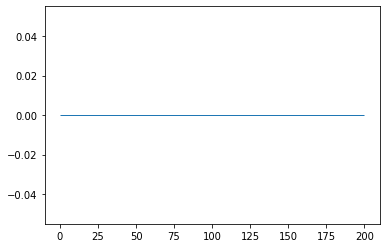

In [16]:
beta_s = generated_data.stan_variable('beta')
plt.stairs(generated_data.stan_variable('beta')[0])

This is an issue called sparsity. We will try to exploit that when infering the results via changing the prior structure. 

### Model 1 - uniform prior for beta

In [17]:
model_uniform = CmdStanModel(stan_file = 'model1.stan')

INFO:cmdstanpy:compiling stan file C:\Users\PLFIZMI\Desktop\analiza\Data-Analytics\lab5\model1.stan to exe file C:\Users\PLFIZMI\Desktop\analiza\Data-Analytics\lab5\model1.exe
ERROR:cmdstanpy:Stan program failed to compile:
--- Translating Stan model to C++ code ---
bin/stanc.exe  --o=C:/Users/PLFIZMI/Desktop/analiza/Data-Analytics/lab5/model1.hpp C:/Users/PLFIZMI/Desktop/analiza/Data-Analytics/lab5/model1.stan
Syntax error in 'C:/Users/PLFIZMI/Desktop/analiza/Data-Analytics/lab5/model1.stan', line 10, column 3 to column 7, parsing error:
   -------------------------------------------------
     8:  parameters {
     9:     vector[M] beta;
    10:     rela alpha;
            ^
    11:     real<lower=0> sigma;
    12:  }
   -------------------------------------------------

Only top-level variable declarations allowed in data and parameters blocks.
make/program:48: recipe for target 'C:/Users/PLFIZMI/Desktop/analiza/Data-Analytics/lab5/model1.hpp' failed
mingw32-make: *** [C:/Users/PLFI

ValueError: Unable to compile Stan model file: C:\Users\PLFIZMI\Desktop\analiza\Data-Analytics\lab5\model1.stan.

In [ ]:
data_for_inference = {'N':100,
                      'M':200,
                      'X':generated_data.stan_variable('X')[0],
                      'y':generated_data.stan_variable('y')[0]
                      }

In [ ]:
fit_unf = model_uniform.sample(data=data_for_inference,seed=seed)

In [ ]:
print(fit_unf.diagnose())

#### Task 1. Evaluating model

1. Analyse the diagnosis of model. What sampling issues occured?
2. For each fitted beta coefficient plot maximum, minimum, and 5, 25, 50, 75, 95 quantiles of simulated weight (all in the same plot). Compare with true values of beta. 
3. Substract true values from fitted betas and make the same plot (residues)

### Model 2 - Narrow weakly informative prior.
We try to improve sampling by regularizing the search space with normal priors. This is prior used in ridge regression (but here is the bayesian context)

In [ ]:
model_reg = CmdStanModel(stan_file = 'model2.stan')

In [ ]:
fit_reg = model_reg.sample(data=data_for_inference,seed=seed)

In [ ]:
print(fit_reg.diagnose())

#### Task 2. Evaluating model

1. Analyse the diagnosis of model. Are the sampling problems solved
2. For each fitted beta coefficient plot maximum, minimum, and 5, 25, 50, 75, 95 quantiles of simulated weight (all in the same plot). Compare with true values of beta. 
3. Substract true values from fitted betas and make the same plot (residues)

### Model 3 -  Sparsity enforcing prior

We will now try to enforce shrinking of small parameters using a Laplace prior. This is a prior that is used in Lasso regression. (but here is the bayesian context)

In [ ]:
model_lap = CmdStanModel(stan_file = 'model3.stan')

In [ ]:
fit_lap = model_lap.sample(data=data_for_inference,seed=seed,adapt_delta=0.99,max_treedepth=12) #sampling problematic some parameters have to be adjusted

In [ ]:
print(fit_lap.diagnose())

#### Task 3. Evaluating model

1. Analyse the diagnosis of model. Are the sampling problems solved. Are there any new sampling issues?
2. For each fitted beta coefficient plot maximum, minimum, and 5, 25, 50, 75, 95 quantiles of simulated weight (all in the same plot). Compare with true values of beta. 
3. Substract true values from fitted betas and make the same plot (residues)